In [1]:
!pip install --pre deepchem
import deepchem as dc
from deepchem.feat.mol_graphs import ConvMol

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 34.8 MB/s 
     |████████████████████████████████| 36.8 MB 25 kB/s 


In [2]:
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.insert(0,'/content/gdrive/My Drive/code/gnn')


Mounted at /content/gdrive


In [3]:
import gnn
import nmgnn
import convmol_dataloader as dl

In [17]:
import importlib
importlib.reload(gnn)
importlib.reload(nmgnn)
importlib.reload(dl)

<module 'convmol_dataloader' from '/content/gdrive/My Drive/code/gnn/convmol_dataloader.py'>

In [4]:
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='GraphConv', splitter='scaffold')
train_dataset, valid_dataset, test_dataset = datasets

In [5]:
max_atoms = max([dl.get_max_atoms(train_dataset), dl.get_max_atoms(valid_dataset), dl.get_max_atoms(test_dataset)])

In [12]:
train_cmg = dl.ConvMolGenerator(train_dataset, batch_size=5, max_atoms=max_atoms)
valid_cmg = dl.ConvMolGenerator(valid_dataset, batch_size=5, max_atoms=max_atoms)

In [25]:
features,adj,labels = dl.ConvMolGenerator(train_dataset, max_atoms=max_atoms).get_in_memory_vectors()
valid_features, valid_adj, valid_labels = dl.ConvMolGenerator(valid_dataset, max_atoms=max_atoms).get_in_memory_vectors()

/content/gdrive/My Drive/code/gnn/convmol_dataloader.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_array[old_array_slices] = array


In [21]:
model = gnn.ATOM_GCN(max_atoms, 75, 12, use_symmetric_mean=True)
model.compile(tf.keras.optimizers.Adam(0.001), loss=keras.losses.binary_crossentropy)

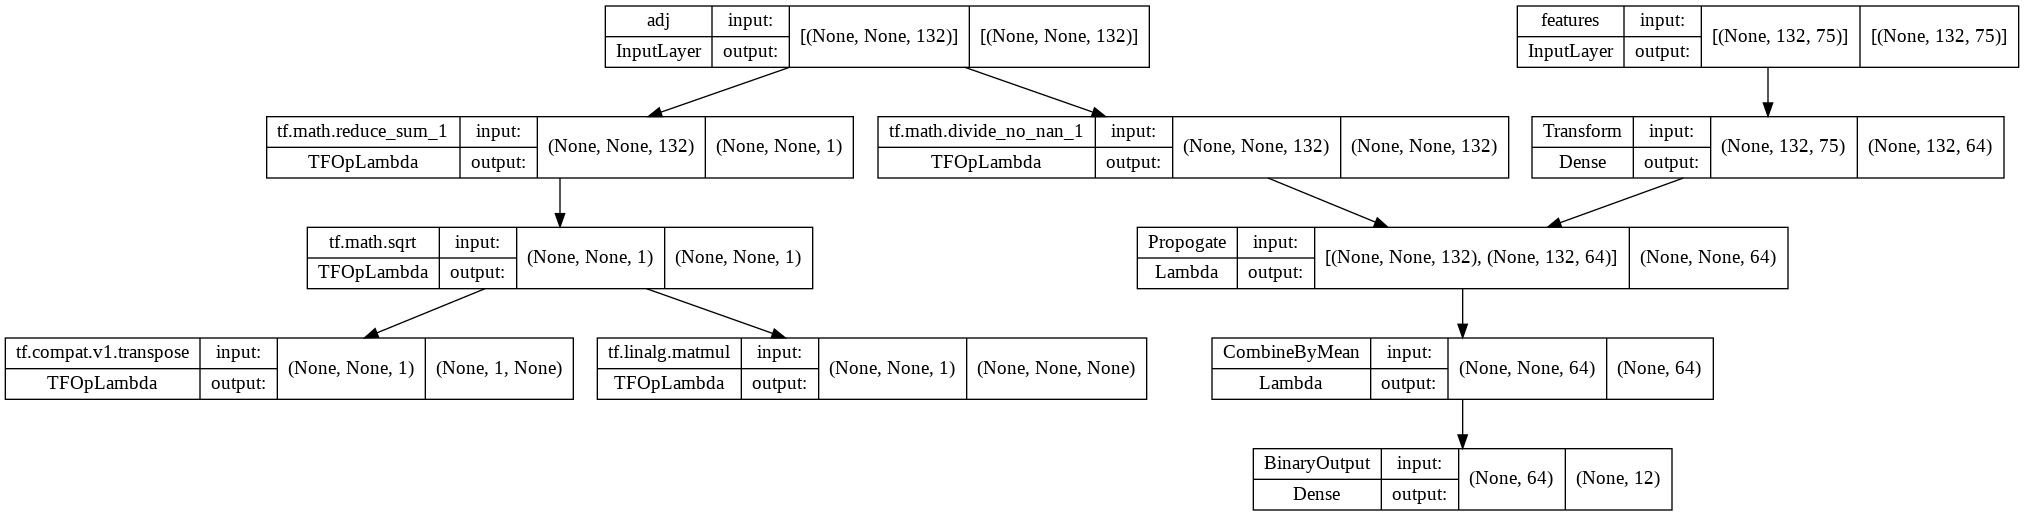

In [33]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [55]:
#model.fit(train_cmg, epochs=10, validation_data=valid_cmg)
model.fit(x=[features,adj], y=labels, epochs=50, batch_size=10, 
          validation_data=([valid_features,valid_adj], valid_labels))



Epoch 1/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1869 - val_loss: 0.2408
Epoch 2/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1868 - val_loss: 0.2406
Epoch 3/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1865 - val_loss: 0.2407
Epoch 4/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1865 - val_loss: 0.2399
Epoch 5/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1866 - val_loss: 0.2405
Epoch 6/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1862 - val_loss: 0.2411
Epoch 7/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1857 - val_loss: 0.2407
Epoch 8/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1857 - val_loss: 0.2409
Epoch 9/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1854 - val_loss: 0.2407
Epoch 10/50
627/627 [==============================] - 3s 5ms/step - loss: 0.1856 - val_loss: 0.2414

In [ ]:
test_cmg = ConvMolGenerator(test_dataset, max_atoms=max_atoms)


In [27]:
test_features, test_adj, test_labels = dl.ConvMolGenerator(test_dataset, max_atoms=max_atoms).get_in_memory_vectors()

/content/gdrive/My Drive/code/gnn/convmol_dataloader.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_array[old_array_slices] = array


In [57]:
model.evaluate([test_features, test_adj], test_labels)

25/25 [==============================] - 0s 8ms/step - loss: 0.2468


0.2468065321445465

In [58]:
predictions=model.predict([test_features, test_adj])

In [59]:
predictions[0], predictions[52]

(array([0.03542792, 0.02391565, 0.07509951, 0.01506313, 0.11997215,
        0.04193715, 0.01569789, 0.08724432, 0.02654997, 0.03126189,
        0.06449813, 0.03798929], dtype=float32),
 array([0.02874905, 0.02071085, 0.09605335, 0.01193469, 0.09296193,
        0.03043075, 0.01521033, 0.08224024, 0.03120045, 0.03218689,
        0.05007038, 0.03305525], dtype=float32))

In [63]:
model.trainable_weights

[<tf.Variable 'Transform/kernel:0' shape=(75, 64) dtype=float32, numpy=
 array([[ 0.3123681 ,  1.2374578 , -0.3328033 , ..., -1.4120933 ,
         -2.0896103 ,  0.2289182 ],
        [ 3.0764465 , -2.3715832 ,  2.1840138 , ...,  2.9788995 ,
          3.040033  ,  1.7419707 ],
        [-0.53669953, -1.3560362 ,  0.6971145 , ...,  1.478877  ,
          1.0744512 , -1.5382718 ],
        ...,
        [ 0.300696  , -0.94254905, -0.9013588 , ..., -0.96679246,
         -1.8312416 , -0.22842018],
        [-0.7735945 ,  0.15429057,  1.1521691 , ...,  0.6956139 ,
          0.1453033 ,  1.8483971 ],
        [ 3.1244302 , -2.9066386 ,  1.9432223 , ...,  2.2537017 ,
          3.105182  ,  3.1223803 ]], dtype=float32)>,
 <tf.Variable 'Transform/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.3272317 ,  1.0587106 ,  0.06132154,  0.24106094,  0.35587212,
         0.13470386,  0.16808821,  0.09704477,  0.12450048,  0.10625678,
         0.18369271,  0.31049284,  0.19926214,  0.20340441,  0.21494679,